<a href="https://colab.research.google.com/github/urmilapol/urmilapolprojects/blob/master/normal_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [4]:
df = pd.read_csv("/content/sample_data/bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [5]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

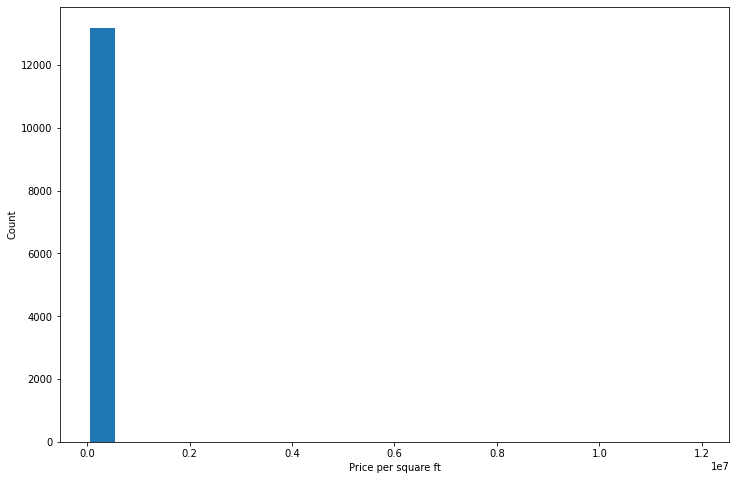

In [6]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

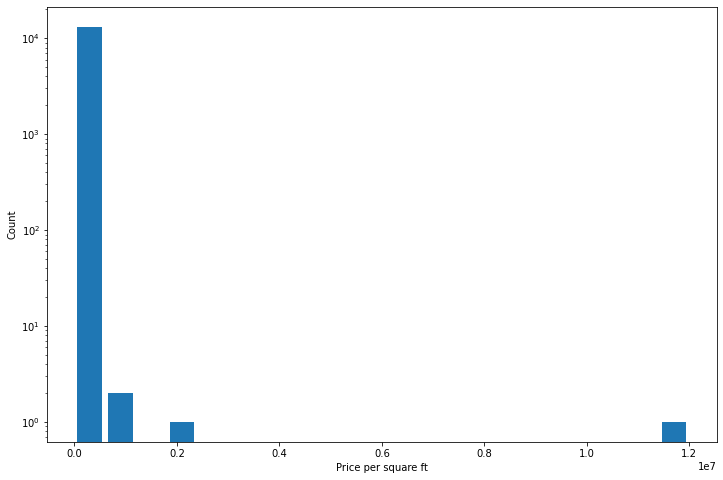

In [7]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [8]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000099)

In [9]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8300,Kengeri,1 BHK,1200.0,1.0,14.0,1,1166
7575,other,1 BHK,425.0,1.0,750.0,1,176470
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875
12355,other,4 BHK,16335.0,4.0,149.0,4,912
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530


In [10]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [11]:
df.shape

(13200, 7)

In [12]:
df.shape[0] - df2.shape[0]

28

In [13]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589429, -9900.429065502549)

In [14]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9873,other,3 Bedroom,2400.00,6.0,775.0,3,32291
13185,Hulimavu,1 BHK,500.00,1.0,220.0,1,44000
12640,other,3 BHK,2777.29,5.0,649.0,3,23368
1548,Uttarahalli,5 Bedroom,400.00,5.0,200.0,5,50000
2830,BTM 2nd Stage,4 Bedroom,1500.00,2.0,450.0,4,30000
4993,other,6 Bedroom,825.00,6.0,400.0,6,48484
7262,other,4 Bedroom,1200.00,5.0,325.0,4,27083
12671,other,4 Bedroom,1200.00,5.0,325.0,4,27083
1281,Chamrajpet,9 Bedroom,4050.00,7.0,1200.0,9,29629
3665,Koramangala,4 Bedroom,2400.00,6.0,600.0,4,25000


In [15]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [16]:
df2.shape[0]-df3.shape[0]

125

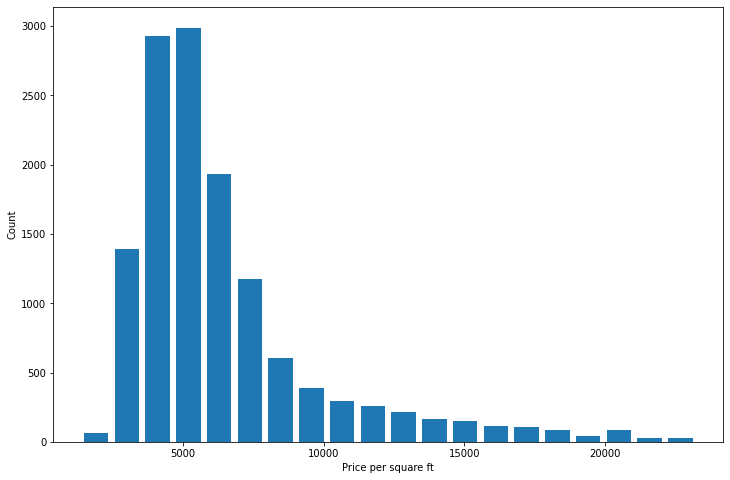

In [17]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

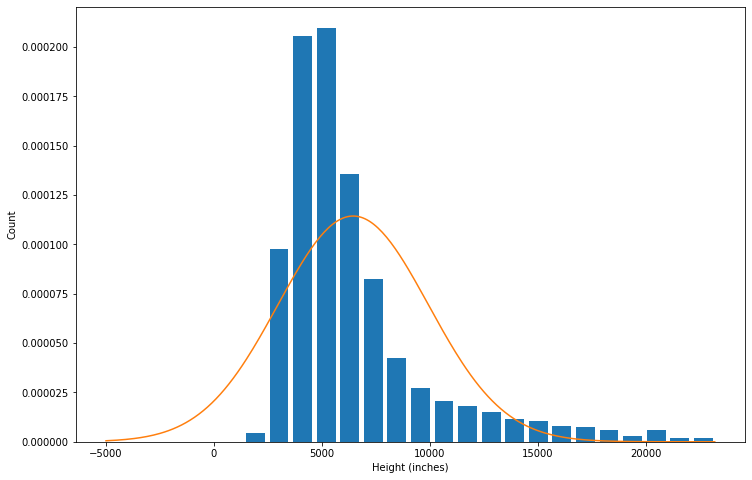

In [18]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

In [20]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
6427,Horamavu Banaswadi,2 BHK,1272.0,2.0,51.5,2,4048,-0.631645
1537,Ulsoor,3 BHK,2700.0,3.0,450.0,3,16666,2.415430
2788,Sarjapur Road,3 BHK,1300.0,2.0,70.0,3,5384,-0.309019
8377,9th Phase JP Nagar,2 Bedroom,1200.0,2.0,80.0,2,6666,0.000567
7261,Choodasandra,3 BHK,1580.0,3.0,105.0,3,6645,-0.004505
4005,Vittasandra,2 BHK,1934.0,2.0,90.0,2,4653,-0.485545
5713,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561,-0.507762
11988,Uttarahalli,3 BHK,1308.0,2.0,53.0,3,4051,-0.630920
4431,EPIP Zone,3 BHK,1734.0,3.0,125.0,3,7208,0.131452
4530,Kumaraswami Layout,6 Bedroom,610.0,4.0,95.0,6,15573,2.151486


In [21]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [22]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
12948,other,10 Bedroom,7150.0,13.0,3600.0,10,50349,10.549415
3401,Indira Nagar,6 Bedroom,2480.0,4.0,750.0,6,30241,5.693607
7901,other,4 Bedroom,2400.0,4.0,600.0,4,25000,4.427977
8595,other,3 Bedroom,1200.0,2.0,300.0,3,25000,4.427977
3675,Kasturi Nagar,5 Bedroom,1650.0,5.0,450.0,5,27272,4.976634


In [23]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [24]:
df2.shape[0] - df4.shape[0]

125